In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')
from tensorflow import keras
plt.rcParams['axes.unicode_minus'] = False
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

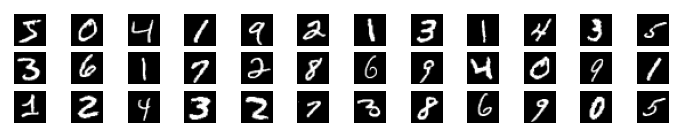

In [3]:
mnist = keras.datasets.mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [4]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [5]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [6]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [10]:
l1 = model.layers[0]
l2 = model.layers[1]

print(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params())
print(l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params())

dense <class 'tensorflow.python.keras.layers.core.Dense'> (None, 15) sigmoid 11775
dense_1 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 10) sigmoid 160


In [11]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=10, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Epoch 1/10
600/600 - 1s - loss: 0.0990 - accuracy: 0.2698 - val_loss: 0.0878 - val_accuracy: 0.3831
Epoch 2/10
600/600 - 1s - loss: 0.0867 - accuracy: 0.4191 - val_loss: 0.0853 - val_accuracy: 0.4480
Epoch 3/10
600/600 - 1s - loss: 0.0835 - accuracy: 0.4619 - val_loss: 0.0811 - val_accuracy: 0.4739
Epoch 4/10
600/600 - 1s - loss: 0.0788 - accuracy: 0.4920 - val_loss: 0.0760 - val_accuracy: 0.5149
Epoch 5/10
600/600 - 1s - loss: 0.0736 - accuracy: 0.5373 - val_loss: 0.0708 - val_accuracy: 0.5545
Epoch 6/10
600/600 - 1s - loss: 0.0684 - accuracy: 0.5762 - val_loss: 0.0657 - val_accuracy: 0.5993
Epoch 7/10
600/600 - 1s - loss: 0.0637 - accuracy: 0.6111 - val_loss: 0.0612 - val_accuracy: 0.6260
Epoch 8/10
600/600 - 1s - loss: 0.0595 - accuracy: 0.6354 - val_loss: 0.0573 - val_accuracy: 0.6467
Epoch 9/10
600/600 - 1s - loss: 0.0559 - accuracy: 0.6579 - val_loss: 0.0539 - val_accuracy: 0.6714
Epoch 10/10
600/600 - 1s - loss: 0.0528 - accuracy: 0.6830 - val_loss: 0.0510 - val_accuracy: 0.6989

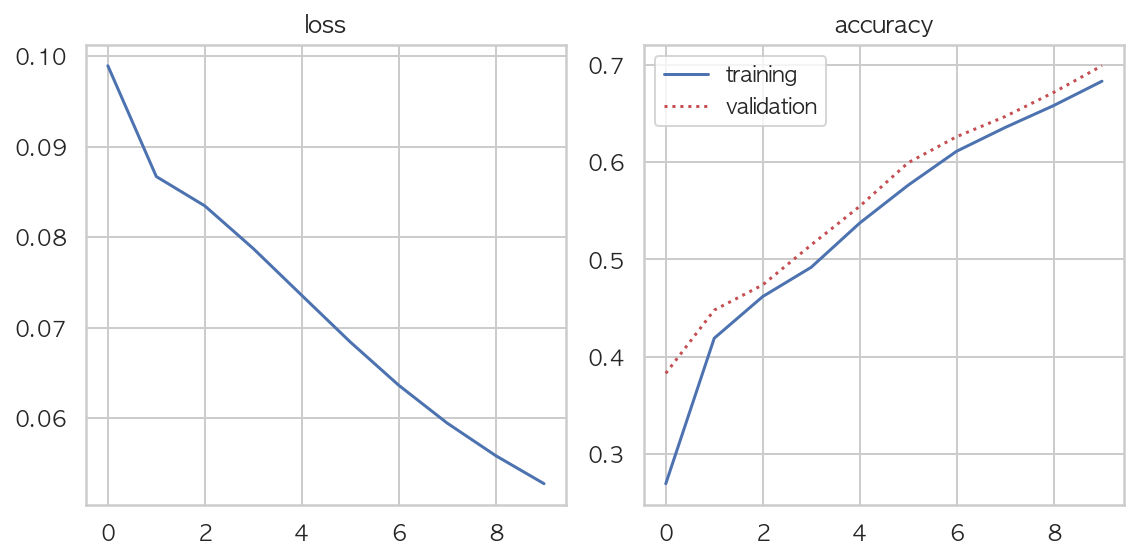

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
w1 = l1.get_weights()
w1[0].shape, w1[1].shape

((784, 15), (15,))

In [14]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

In [18]:
model.predict(X_test[:1, :])

array([[0.12934908, 0.04481784, 0.06268558, 0.10488045, 0.10673136,
        0.13697234, 0.00948668, 0.696198  , 0.1374588 , 0.21402548]],
      dtype=float32)

In [23]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

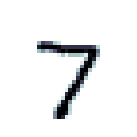

In [24]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test0[0], cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()